<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/feature_engineering_trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho integrado de Feature Engineering 8DTS
1.   RM351578 - RODRIGO DE FEO VIEIRA
2.   RM351070 - DANILO DOS SANTOS DA FONTE
1.   RM350640 - FELIPE FIORIM CARVALHO SILVA
2.   RM352054 - GABRIEL GONSALVES DE ALMEIDA


In [ ]:
### adicionando import de libs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
#Agora vamos criar uma funcao para poder realizar o upload do arquivo no Colab

from google.colab import files

uploaded = files.upload()

Saving dataset.txt to dataset.txt


In [ ]:
#Como nao sabemos qual o enconde o arquivo foi gerado vamos investigar
import chardet
# Abre o arquivo em modo de leitura binária
with open('dataset.txt', 'rb') as arquivo:
    # Lê uma quantidade de bytes do arquivo para análise
    dados = arquivo.read()
    # Detecta o encoding dos dados
    resultado = chardet.detect(dados)

# Exibe o resultado
print("Encoding do arquivo:", resultado['encoding'])

Encoding do arquivo: ISO-8859-1


In [ ]:
#Vamos agora ler os dados do arquivo importado com o encoding ISO-8859-1
df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)

<ipython-input-7-d55eb56d76ea>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)


In [ ]:
#Vamos verificar uma amostra dos dados para identificar se a leitura foi realizada de forma correta
df_clientes.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [ ]:
#Lendo o arquivo de descritivo de rotulos das variaveis
uploaded = files.upload()

Saving descritivo_características.xlsx to descritivo_características.xlsx


In [ ]:
#Criando o Dataframe com os rotulos
df_descritivo_rotulos_clientes = pd.read_excel('descritivo_características.xlsx')

In [ ]:
#Separando apenas as colunas que identificam os rotulos
df_rotulos = df_descritivo_rotulos_clientes['Característica']
df_rotulos.head()

0                  ID_CLIENTE
1            TIPO_FUNCIONARIO
2               DIA_PAGAMENTO
3        TIPO_ENVIO_APLICACAO
4    QUANT_CARTOES_ADICIONAIS
Name: Característica, dtype: object

In [ ]:
#Vamos agora transformar a coluna caracteristica nos rotulos das colunas
# porem primeiro vamos transformar os rotulos em um data frame
df_rotulos = pd.DataFrame(df_rotulos)
df_rotulos.head()

,Característica
0,ID_CLIENTE
1,TIPO_FUNCIONARIO
2,DIA_PAGAMENTO
3,TIPO_ENVIO_APLICACAO
4,QUANT_CARTOES_ADICIONAIS


In [ ]:
#Pronto agora apenas vamos setar os rotulos das colunas no dataframe de clientes
df_clientes = df_clientes.rename(columns= df_rotulos['Característica'])
df_clientes.head()

,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


In [ ]:
### descrevendo tipo de dados das variaveis
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

Nesta primeira analise é possível observar que encontramos 8 variáveis que contém dados nulos. Vamos identificar a melhor forma de tratar cada uma delas

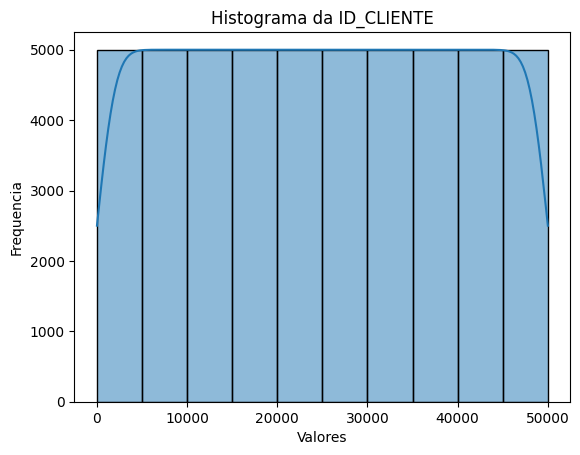

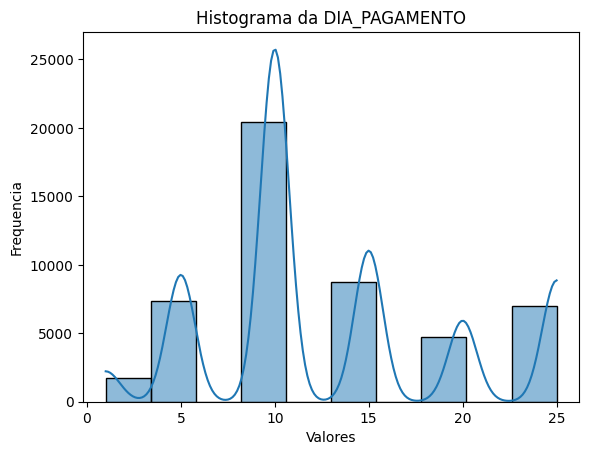

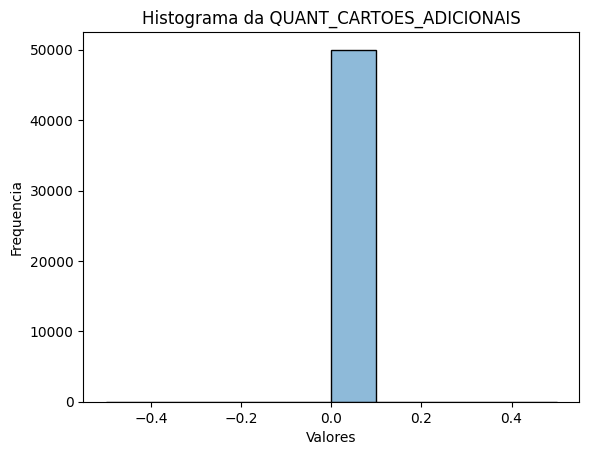

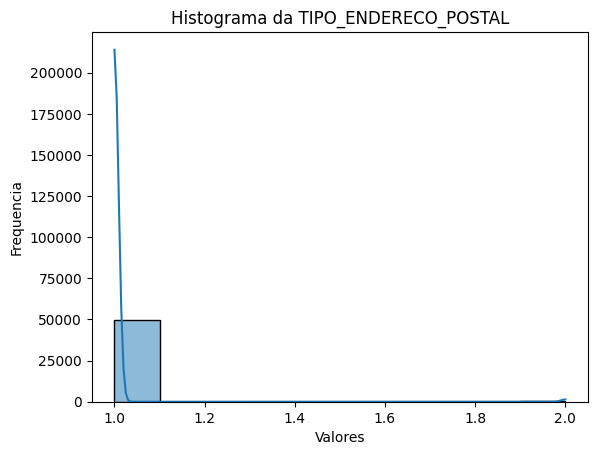

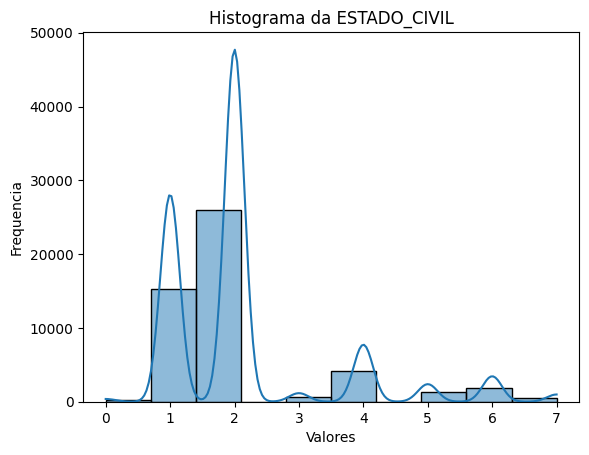

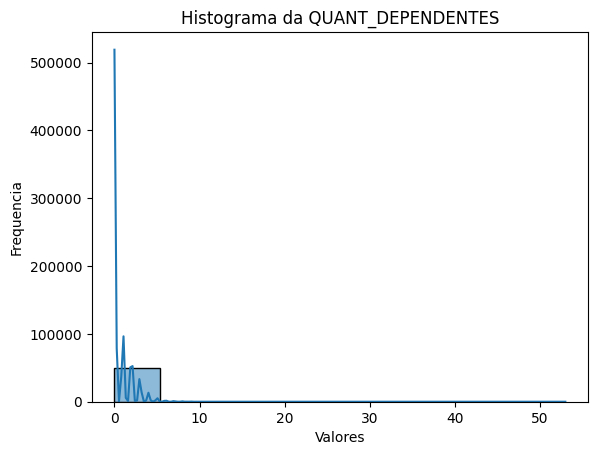

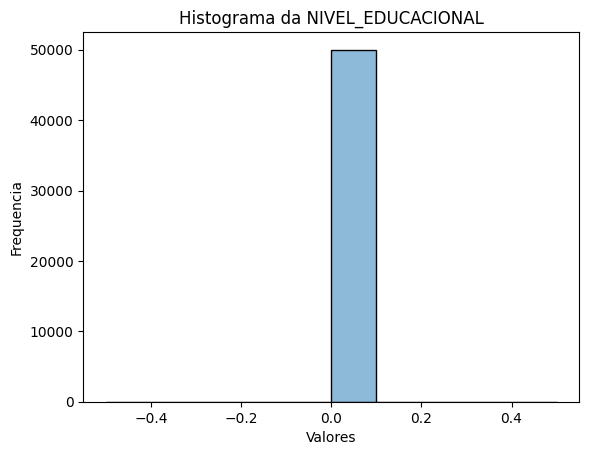

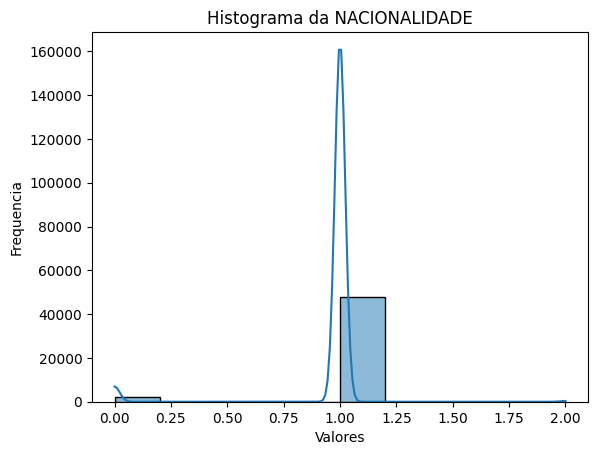

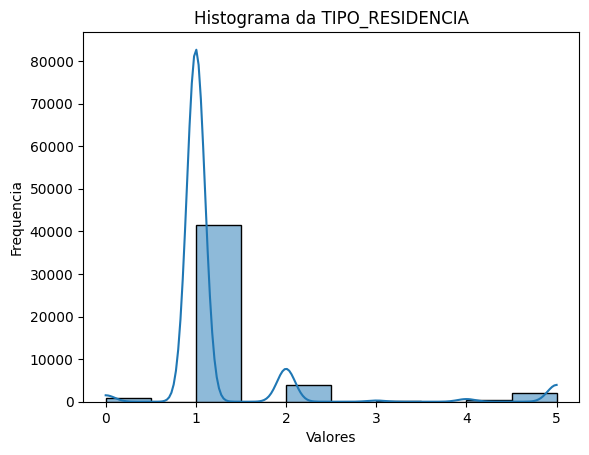

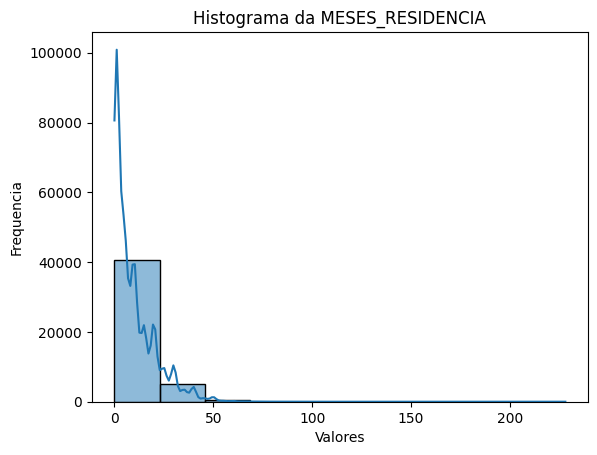

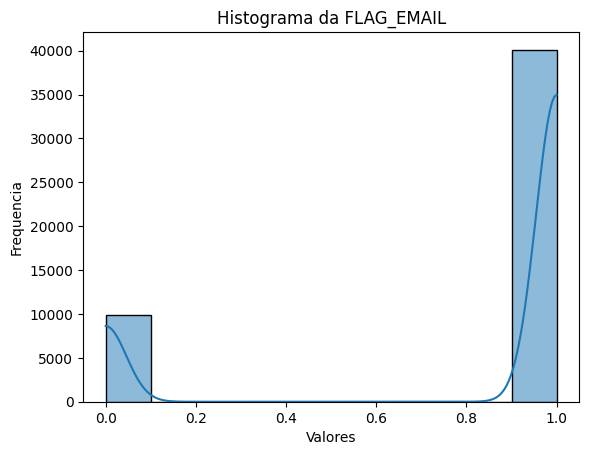

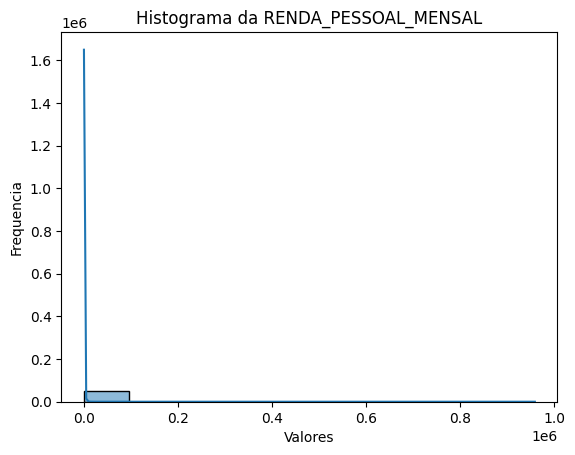

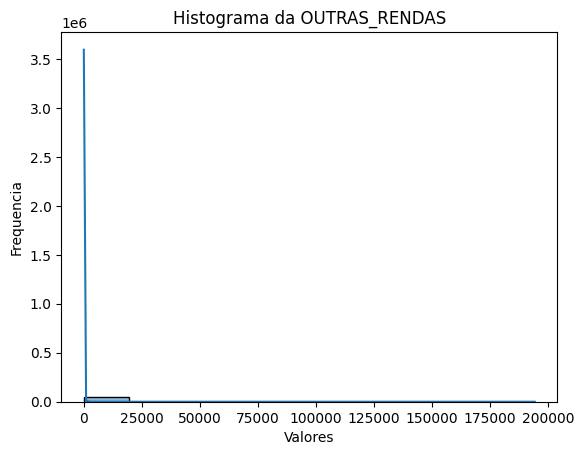

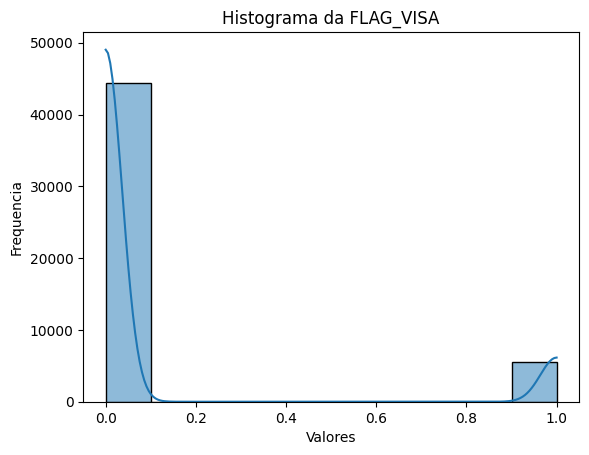

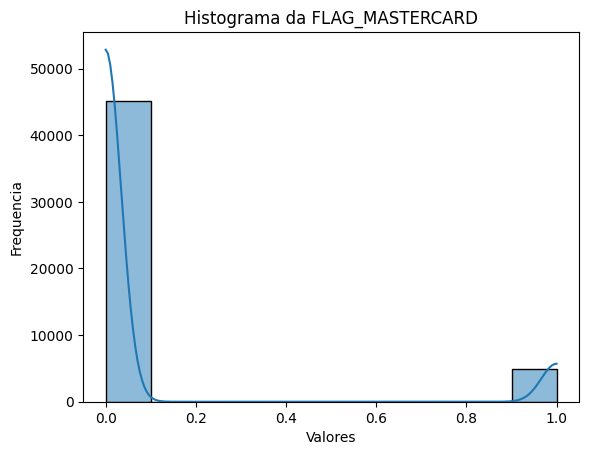

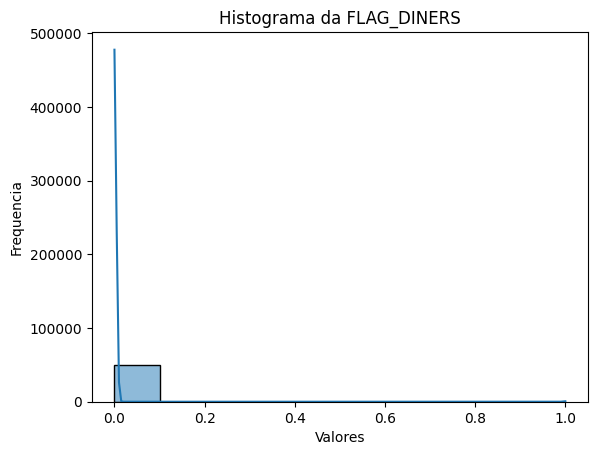

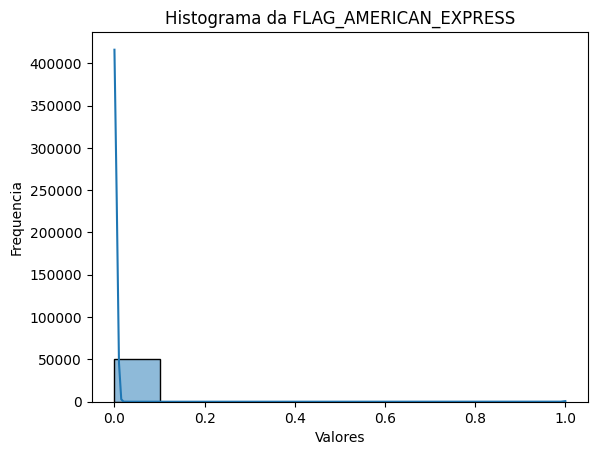

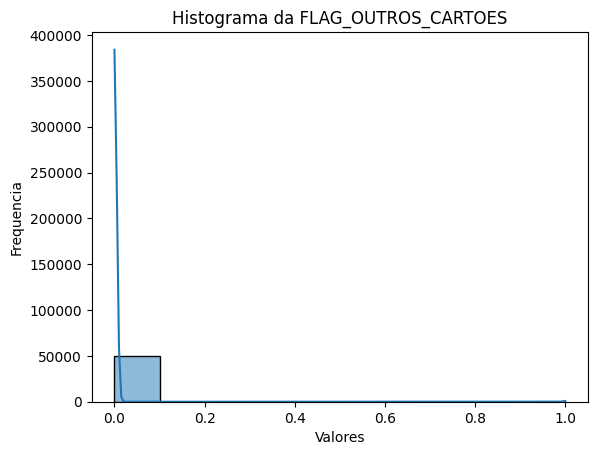

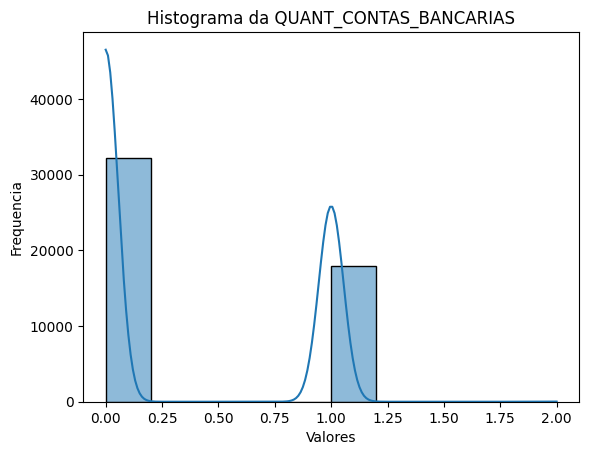

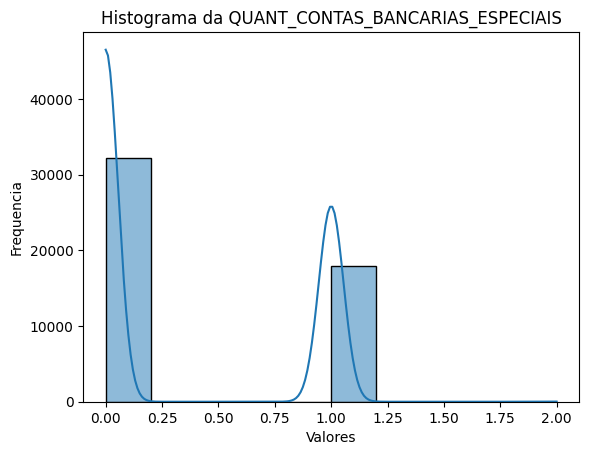

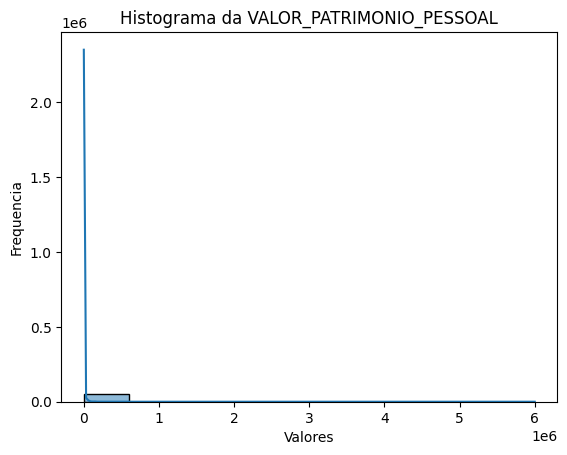

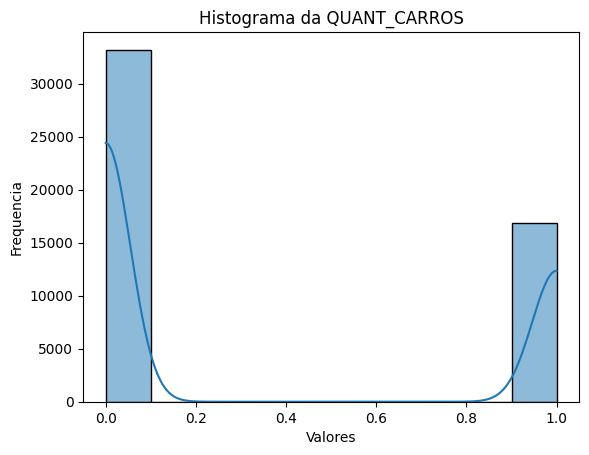

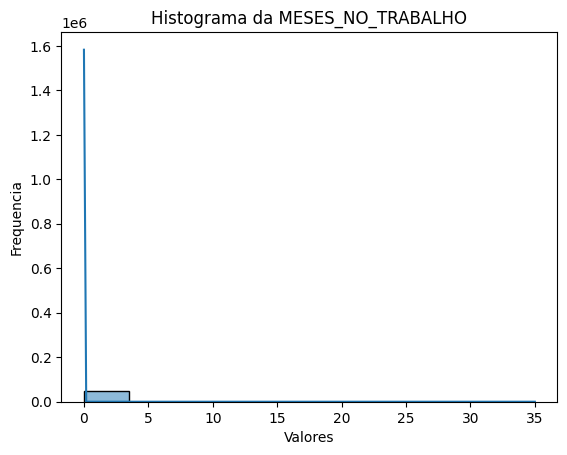

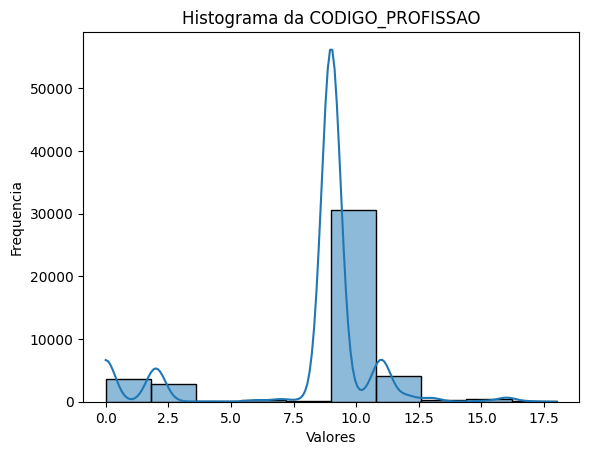

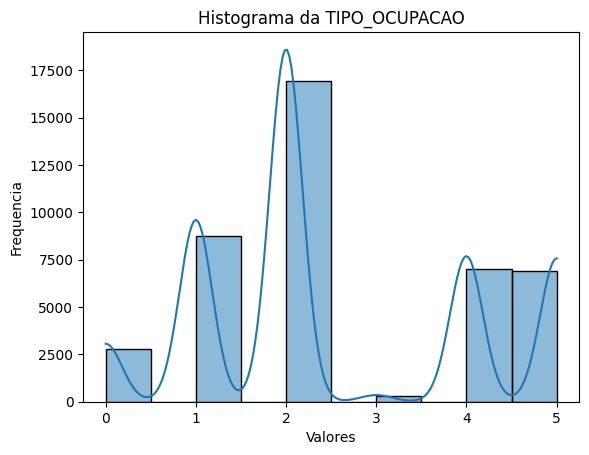

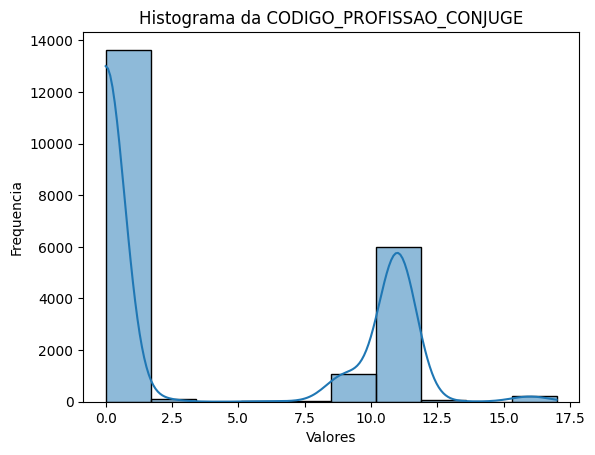

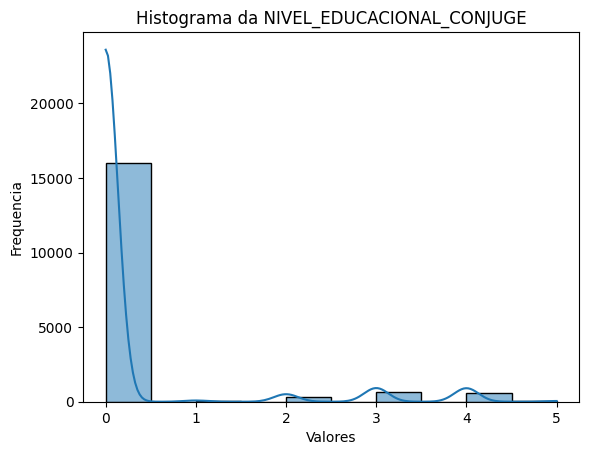

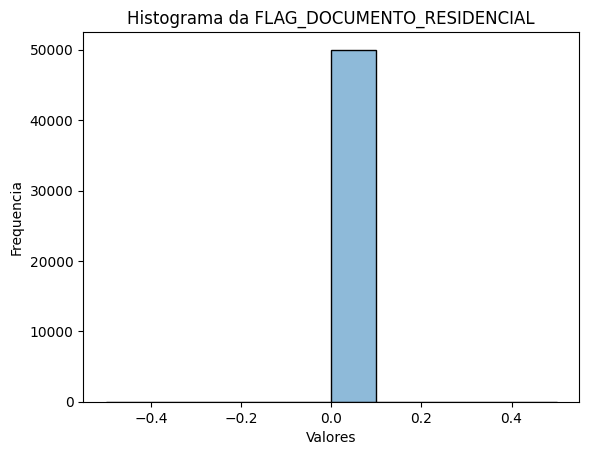

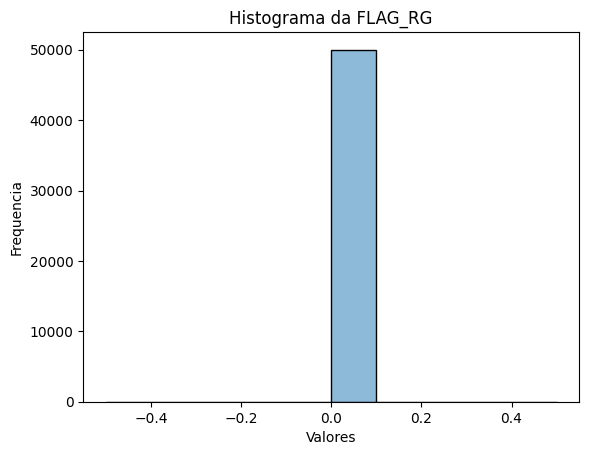

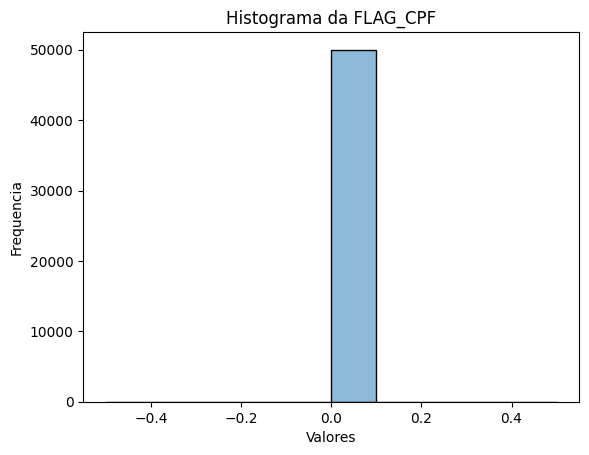

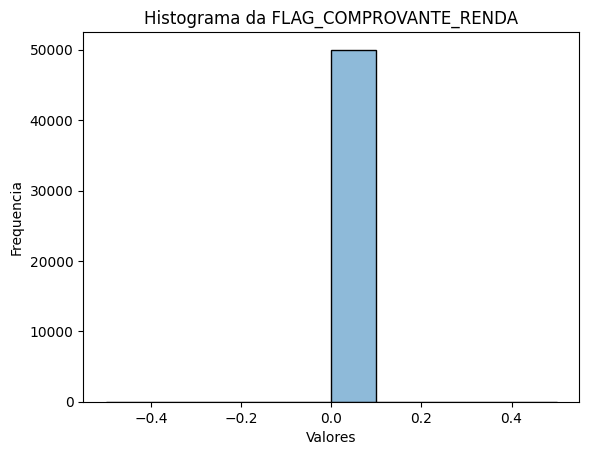

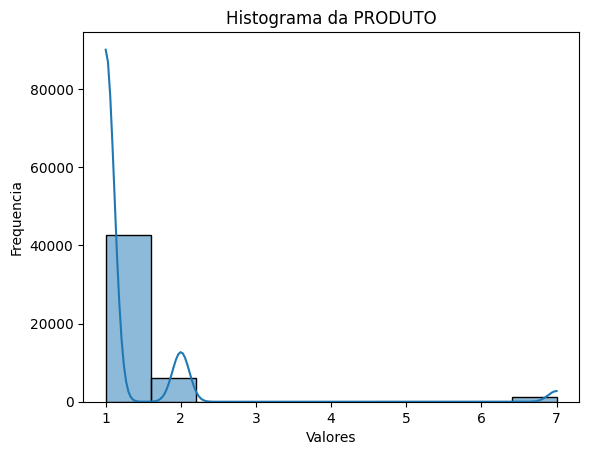

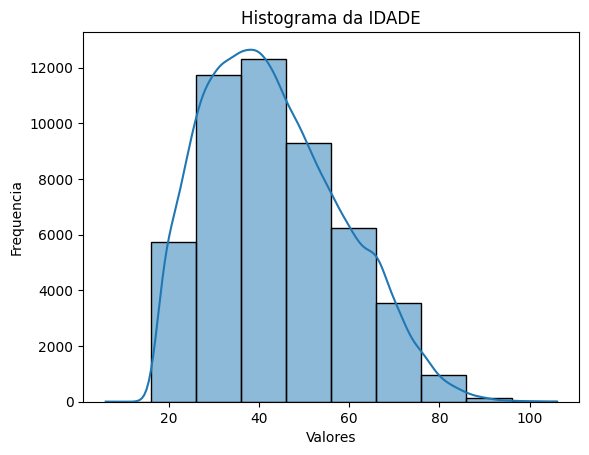

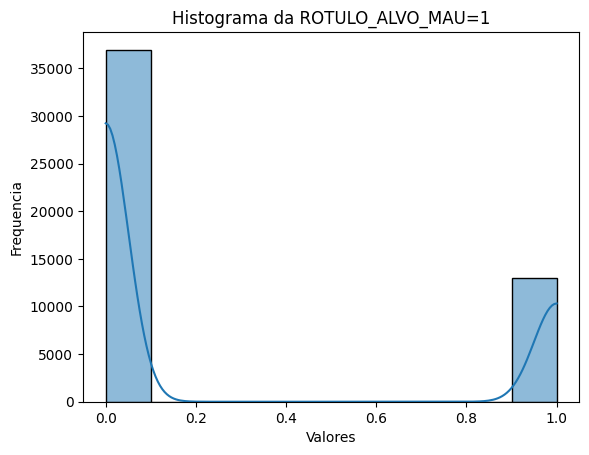

In [ ]:
### plotando histograma para variaveis
for coluna in df_clientes.columns:
    if df_clientes[coluna].dtype in ['int64', 'float64']:
        sns.histplot(df_clientes[coluna], bins=10, kde=True)
        plt.title(f'Histograma da {coluna}')
        plt.xlabel('Valores')
        plt.ylabel('Frequencia')
        plt.show()

A partir da analise dos histogramas foi possível mepear variaveis que não serão relevantes para o modelo, seja por ser identificador do cliente, ou por não possuir valor de discriminação do cliente, como por exemplo a variável de cartões adicionais que está zerada para todos clientes.


In [ ]:
### removende e identificando variaveis não relevantes

df_clientes = df_clientes.drop('ID_CLIENTE', axis=1)
df_clientes = df_clientes.drop('QUANT_CARTOES_ADICIONAIS', axis=1)
df_clientes = df_clientes.drop('TIPO_ENDERECO_POSTAL', axis=1)
df_clientes = df_clientes.drop('NIVEL_EDUCACIONAL', axis=1)
df_clientes = df_clientes.drop('FLAG_DINERS', axis=1)
df_clientes = df_clientes.drop('FLAG_AMERICAN_EXPRESS', axis=1)
df_clientes = df_clientes.drop('FLAG_OUTROS_CARTOES', axis=1)
df_clientes = df_clientes.drop('FLAG_DOCUMENTO_RESIDENCIAL', axis=1)
df_clientes = df_clientes.drop('FLAG_RG', axis=1)
df_clientes = df_clientes.drop('FLAG_CPF', axis=1)
df_clientes = df_clientes.drop('FLAG_COMPROVANTE_RENDA', axis=1)
df_clientes = df_clientes.drop('BAIRRO_RESIDENCIAL', axis=1)
df_clientes = df_clientes.drop('CODIGO_AREA_TELEFONE_RESIDENCIAL', axis=1)
df_clientes = df_clientes.drop('EMPRESA', axis=1)
df_clientes = df_clientes.drop('FLAG_TELEFONE_PROFISSIONAL', axis=1)
df_clientes = df_clientes.drop('CODIGO_AREA_TELEFONE_PROFISSIONAL', axis=1)
df_clientes = df_clientes.drop('FLAG_TELEFONE_RESIDENCIAL', axis=1)
df_clientes = df_clientes.drop('CEP_PROFISSIONAL_3', axis=1)
df_clientes = df_clientes.drop('CEP_RESIDENCIAL_3', axis=1)
df_clientes = df_clientes.drop('ESTADO_PROFISSIONAL', axis=1)


Após uma primeira limpeza dos dados vamos analisar como ficou nosso dataframe

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TIPO_FUNCIONARIO                  50000 non-null  object 
 1   DIA_PAGAMENTO                     50000 non-null  int64  
 2   TIPO_ENVIO_APLICACAO              50000 non-null  object 
 3   SEXO                              50000 non-null  object 
 4   ESTADO_CIVIL                      50000 non-null  int64  
 5   QUANT_DEPENDENTES                 50000 non-null  int64  
 6   ESTADO_NASCIMENTO                 50000 non-null  object 
 7   CIDADE_NASCIMENTO                 50000 non-null  object 
 8   NACIONALIDADE                     50000 non-null  int64  
 9   ESTADO_RESIDENCIAL                50000 non-null  object 
 10  CIDADE_RESIDENCIAL                50000 non-null  object 
 11  TIPO_RESIDENCIA                   48651 non-null  float64
 12  MESE

Analisando variáveis descritivas

In [ ]:
### verificando valores da varivavel tipo de funcionário
print(df_clientes['TIPO_FUNCIONARIO'].unique())

### contando valores da variavel
print(df_clientes['TIPO_FUNCIONARIO'].value_counts())

### dropand variavel por possuir apenas um valor
df_clientes = df_clientes.drop('TIPO_FUNCIONARIO', axis=1)

['C']
TIPO_FUNCIONARIO
C    50000
Name: count, dtype: int64


A variável não possui carater descritivo, todos os dados vêm com valor "C"

In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DIA_PAGAMENTO                     50000 non-null  int64  
 1   TIPO_ENVIO_APLICACAO              50000 non-null  object 
 2   SEXO                              50000 non-null  object 
 3   ESTADO_CIVIL                      50000 non-null  int64  
 4   QUANT_DEPENDENTES                 50000 non-null  int64  
 5   ESTADO_NASCIMENTO                 50000 non-null  object 
 6   CIDADE_NASCIMENTO                 50000 non-null  object 
 7   NACIONALIDADE                     50000 non-null  int64  
 8   ESTADO_RESIDENCIAL                50000 non-null  object 
 9   CIDADE_RESIDENCIAL                50000 non-null  object 
 10  TIPO_RESIDENCIA                   48651 non-null  float64
 11  MESES_RESIDENCIA                  46223 non-null  float64
 12  FLAG

In [ ]:
### removendo variaveis cujos valores nulos representam mais de 50% dos dados
df_clientes = df_clientes.drop('CODIGO_PROFISSAO_CONJUGE', axis=1)
df_clientes = df_clientes.drop('NIVEL_EDUCACIONAL_CONJUGE', axis=1)
df_clientes = df_clientes.drop('BAIRRO_PROFISSIONAL', axis=1)
df_clientes = df_clientes.drop('CIDADE_PROFISSIONAL', axis=1)
df_clientes = df_clientes.drop('TIPO_ENVIO_APLICACAO', axis=1)

Iniciando análise e tratamento dos campos que possuem dados nulos

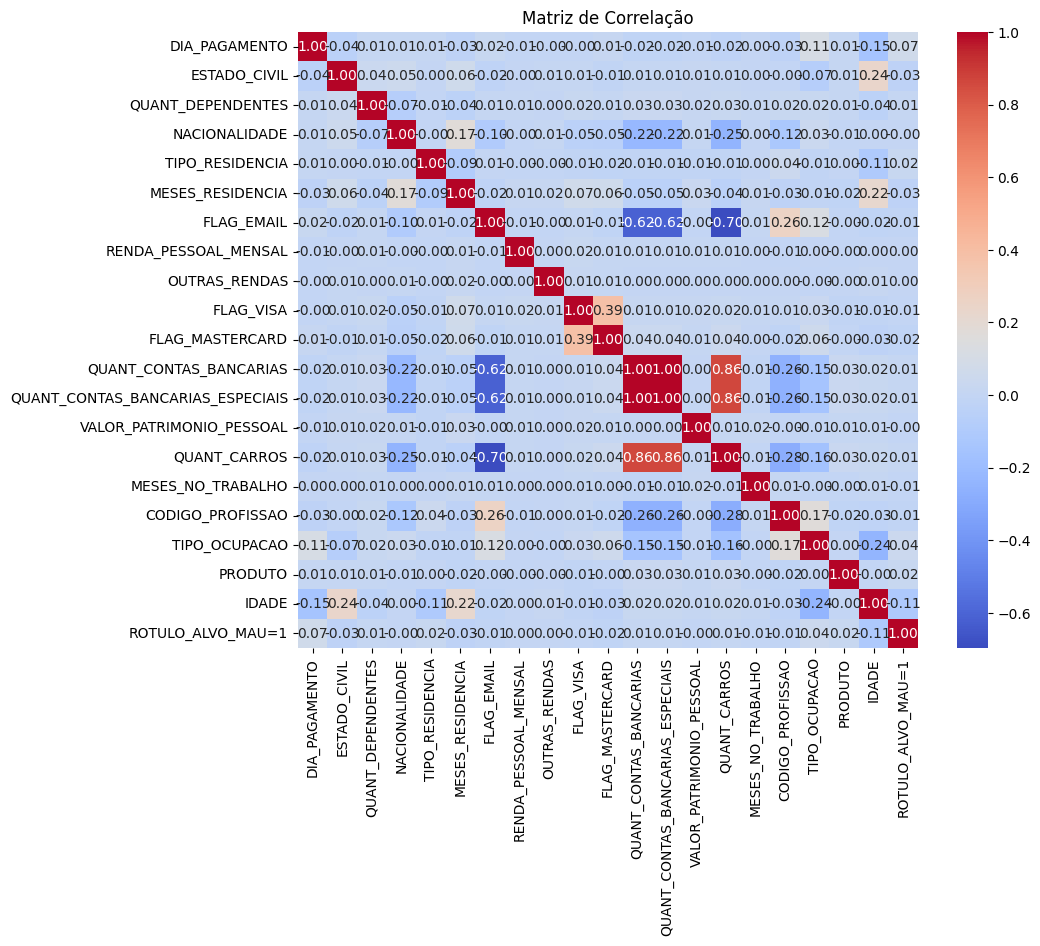

In [ ]:
### buscando correlação entre tipo_residencia e variaveis quantitativas

df_quantitativo = df_clientes.select_dtypes(include=['int64', 'float64'])

correlacao = df_quantitativo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

TIPO_RESIDENCIA possui correlação com a variável de IDADE, vamos avaliar como essa variáveis se correlacionam

<ipython-input-12-3e5e0130564d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TIPO_RESIDENCIA', y='IDADE', data=df_clientes, palette='hls')


<Axes: xlabel='TIPO_RESIDENCIA', ylabel='IDADE'>

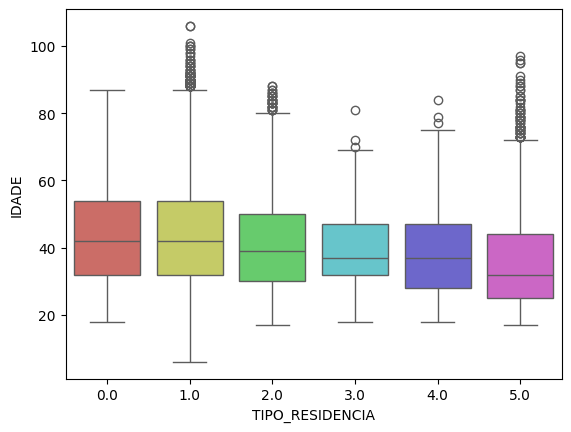

In [ ]:
### vamos verificar a relação do tipo de residencia com a idade

sns.boxplot(x='TIPO_RESIDENCIA', y='IDADE', data=df_clientes, palette='hls')

In [ ]:
### criando uma função para alencar um valor para a variavel tipo de residencia com base na idade
def tp_res(columns):
    idade = columns[0]
    tp_res = columns[1]

    if pd.isnull(tp_res):
        if idade <= 28:
            return 5
        elif idade > 28 and idade <= 30:
            return 4
        elif idade > 30 and idade <= 35:
            return 3
        elif idade > 35 and idade <= 38:
            return 2
        elif idade > 38 and idade <= 40:
            return 1
        else:
            return 0
    else:
        return tp_res

In [ ]:
### aplicando função ao dataset
df_clientes['TIPO_RESIDENCIA'] = df_clientes[['IDADE','TIPO_RESIDENCIA']].apply(tp_res, axis=1)
df_clientes.isnull().sum()

DIA_PAGAMENTO                          0
SEXO                                   0
ESTADO_CIVIL                           0
QUANT_DEPENDENTES                      0
ESTADO_NASCIMENTO                      0
CIDADE_NASCIMENTO                      0
NACIONALIDADE                          0
ESTADO_RESIDENCIAL                     0
CIDADE_RESIDENCIAL                     0
TIPO_RESIDENCIA                        0
MESES_RESIDENCIA                    3777
FLAG_TELEFONE_MOVEL                    0
FLAG_EMAIL                             0
RENDA_PESSOAL_MENSAL                   0
OUTRAS_RENDAS                          0
FLAG_VISA                              0
FLAG_MASTERCARD                        0
QUANT_CONTAS_BANCARIAS                 0
QUANT_CONTAS_BANCARIAS_ESPECIAIS       0
VALOR_PATRIMONIO_PESSOAL               0
QUANT_CARROS                           0
MESES_NO_TRABALHO                      0
CODIGO_PROFISSAO                    7756
TIPO_OCUPACAO                       7313
PRODUTO         

Avaliando a matriz de correlação exposta acima, MESES_RESIDENCIA também se correlaciona com a viaravel IDADE


In [ ]:
# criando uma funçao para transformar idade em faixas para facilitar a analise
def fx_idade(idade):

    if idade <= 25:
      return '[6 - 25]'
    elif idade <= 35:
      return '[26 - 35]'
    elif idade <= 45:
      return '[36 - 45]'
    elif idade <= 55:
      return '[46 - 55]'
    elif idade <= 65:
      return '[56 - 65]'
    else:
      return '[>= 66]'


In [ ]:
df_clientes['fx_idade'] = df_clientes['IDADE'].apply(fx_idade)

<ipython-input-17-4c9b5cbcfe5c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fx_idade', y='MESES_RESIDENCIA', data=df_clientes, palette='hls')


<Axes: xlabel='fx_idade', ylabel='MESES_RESIDENCIA'>

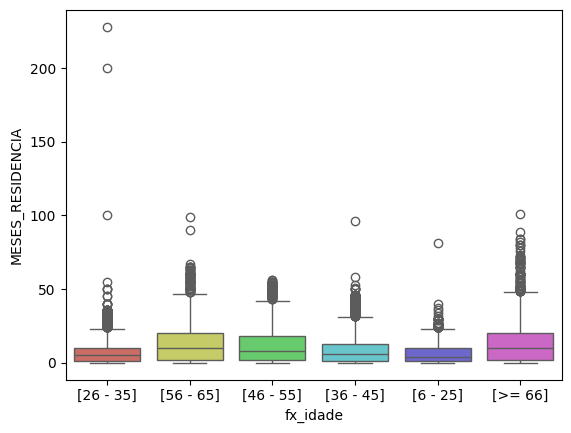

In [ ]:
sns.boxplot(x='fx_idade', y='MESES_RESIDENCIA', data=df_clientes, palette='hls')

É possível notar a relação de faixa de idade com meses de residencia, quanto maior a faixa mais meses de residencia

In [ ]:
### definindo função para definir valor de meses residencia com base em fx_idade
def mres(columns):
    mes_res = columns[0]
    fx_idade = columns[1]


    if pd.isnull(mes_res):
        if fx_idade == '[6 - 25]':
          return 4
        elif fx_idade == '[26 - 35]':
          return 5
        elif fx_idade == '[36 - 45]':
          return 6
        elif fx_idade == '[46 - 55]':
          return 8
        elif fx_idade == '[56 - 65]':
          return 10
        else:
          return 9
    else:
        return mes_res

In [ ]:
### aplicando função ao dataset
df_clientes['MESES_RESIDENCIA'] = df_clientes[['MESES_RESIDENCIA','fx_idade']].apply(mres, axis=1)
df_clientes.isnull().sum()


DIA_PAGAMENTO                          0
SEXO                                   0
ESTADO_CIVIL                           0
QUANT_DEPENDENTES                      0
ESTADO_NASCIMENTO                      0
CIDADE_NASCIMENTO                      0
NACIONALIDADE                          0
ESTADO_RESIDENCIAL                     0
CIDADE_RESIDENCIAL                     0
TIPO_RESIDENCIA                        0
MESES_RESIDENCIA                       0
FLAG_TELEFONE_MOVEL                    0
FLAG_EMAIL                             0
RENDA_PESSOAL_MENSAL                   0
OUTRAS_RENDAS                          0
FLAG_VISA                              0
FLAG_MASTERCARD                        0
QUANT_CONTAS_BANCARIAS                 0
QUANT_CONTAS_BANCARIAS_ESPECIAIS       0
VALOR_PATRIMONIO_PESSOAL               0
QUANT_CARROS                           0
MESES_NO_TRABALHO                      0
CODIGO_PROFISSAO                    7756
TIPO_OCUPACAO                       7313
PRODUTO         

In [ ]:
### removendo a coluna de fx_idade que criamos
df_clientes = df_clientes.drop('fx_idade', axis=1)

In [ ]:
### verificando valores da varivavel CODIGO_PROFISSAO
print(df_clientes['CODIGO_PROFISSAO'].unique())

### contando valores da variavel
print(df_clientes['CODIGO_PROFISSAO'].value_counts())

[ 9. 11. nan  0.  2. 13.  7. 12.  6. 16.  8. 10. 15. 17.  3.  4.  5. 18.
 14.  1.]
CODIGO_PROFISSAO
9.0     30092
11.0     3545
0.0      3540
2.0      2827
12.0      489
10.0      425
16.0      344
13.0      313
7.0       216
8.0       144
6.0       136
15.0       63
17.0       35
4.0        27
3.0        18
5.0        12
14.0        9
1.0         8
18.0        1
Name: count, dtype: int64


A maior correlação de codigo_profissao é com a variavel flag_email, vamos ver como se relacionam

<ipython-input-22-4f0917496cbe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CODIGO_PROFISSAO', y='FLAG_EMAIL', data=df_clientes, palette='hls')


<Axes: xlabel='CODIGO_PROFISSAO', ylabel='FLAG_EMAIL'>

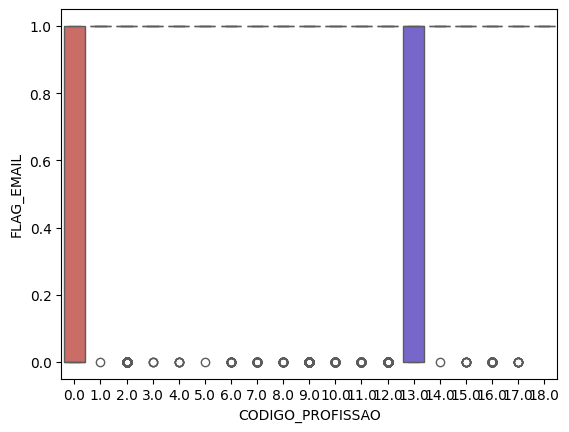

In [ ]:
### verificando correlação entre flag_email e codigo profissao
sns.boxplot(x='CODIGO_PROFISSAO', y='FLAG_EMAIL', data=df_clientes, palette='hls')

In [ ]:
### vamos remover a variavel codigo profissao devio a ausencia de correlação
df_clientes = df_clientes.drop('CODIGO_PROFISSAO', axis=1)

In [ ]:
### verificando valores da varivavel TIPO_OCUPACAO
print(df_clientes['TIPO_OCUPACAO'].unique())

### contando valores da variavel
print(df_clientes['TIPO_OCUPACAO'].value_counts())

[ 4. nan  5.  2.  1.  0.  3.]
TIPO_OCUPACAO
2.0    16947
1.0     8742
4.0     7000
5.0     6891
0.0     2788
3.0      319
Name: count, dtype: int64


<ipython-input-25-480a4b30838d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TIPO_OCUPACAO', y='IDADE', data=df_clientes, palette='hls')


<Axes: xlabel='TIPO_OCUPACAO', ylabel='IDADE'>

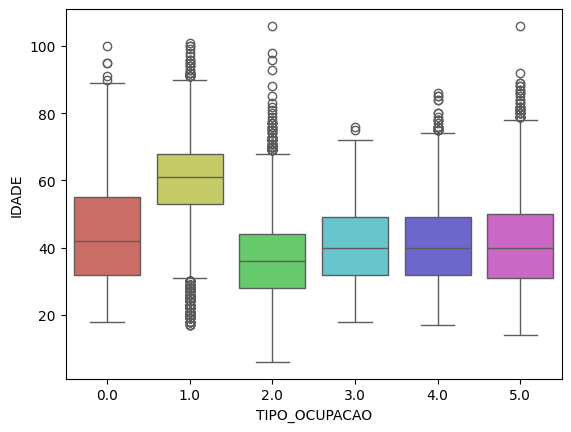

In [ ]:
### verificando correlação entre idade e tipo_ocupacao
sns.boxplot(x='TIPO_OCUPACAO', y='IDADE', data=df_clientes, palette='hls')

In [ ]:
### vamos remover a variavel TIPO_OCUPACAO devio a ausencia de correlação
df_clientes = df_clientes.drop('TIPO_OCUPACAO', axis=1)

In [ ]:
### contando váriaveis nulas
df_clientes.isnull().sum()

ID_CLIENTE                           0
TIPO_FUNCIONARIO                     0
DIA_PAGAMENTO                        0
QUANT_CARTOES_ADICIONAIS             0
TIPO_ENDERECO_POSTAL                 0
SEXO                                 0
ESTADO_CIVIL                         0
QUANT_DEPENDENTES                    0
NIVEL_EDUCACIONAL                    0
ESTADO_NASCIMENTO                    0
CIDADE_NASCIMENTO                    0
NACIONALIDADE                        0
ESTADO_RESIDENCIAL                   0
CIDADE_RESIDENCIAL                   0
BAIRRO_RESIDENCIAL                   0
FLAG_TELEFONE_RESIDENCIAL            0
CODIGO_AREA_TELEFONE_RESIDENCIAL     0
TIPO_RESIDENCIA                      0
MESES_RESIDENCIA                     0
FLAG_TELEFONE_MOVEL                  0
FLAG_EMAIL                           0
RENDA_PESSOAL_MENSAL                 0
OUTRAS_RENDAS                        0
FLAG_VISA                            0
FLAG_MASTERCARD                      0
FLAG_DINERS              

In [ ]:
### com a ausencia de variaveis nulas vamos começar a transformar variaveis qualitativas em dummies
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 4   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 5   SEXO                               50000 non-null  object 
 6   ESTADO_CIVIL                       50000 non-null  int64  
 7   QUANT_DEPENDENTES                  50000 non-null  int64  
 8   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 9   ESTADO_NASCIMENTO                  50000 non-null  object 
 10  CIDADE_NASCIMENTO                  50000 non-null  object 
 11  NACIONALIDADE                      50000 non-null  int

Após tratar os campos nulos precisamos transformar as variáveis qualitativas em dummies para o modelo

In [ ]:
sexo = pd.get_dummies(df_clientes['SEXO'],drop_first=True)
sexo.head()

,F,M,N
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,True,False


In [ ]:
estado_res = pd.get_dummies(df_clientes['ESTADO_RESIDENCIAL'],drop_first=True)
estado_res.head()

,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,...,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
cidade_res = pd.get_dummies(df_clientes['CIDADE_RESIDENCIAL'],drop_first=True)
cidade_res.head()

,ABADIA DE GOIAS,ABAETETUBA,ABLUMENAU,ABRE E LIMA,ABREU DE LIMA,ABREU E LIMA,ACAIALNDIA,ACAILANDIA,ACARA,ACARAPE,...,vera cruz,vespasiano,viamao,vicosa,vicosa do ceara,vigia,vila velha,vitoria da conquista,viturino,volta redonda
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
estado_nasc = pd.get_dummies(df_clientes['ESTADO_NASCIMENTO'],drop_first=True)
estado_nasc.head()

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,...,RJ,RN,RO,RR,RS,SC,SE,SP,TO,XX
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
cidade_nasc = pd.get_dummies(df_clientes['CIDADE_NASCIMENTO'],drop_first=True)
cidade_nasc.head()

,1051970,13051961,19091978,22011945,22071971,22082002,29081953,30011974,4PATROCINIO,4PELOTAS,...,xxxxxxx,xxxxxxxx,xxxxxxxx xxxxxxxxxx,xxxxxxxxx,xxxxxxxxxx,xxxxxxxxxxx,xxxxxxxxxxxx,xxxxxxxxxxxxxxx,xzx,zx
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
flag_m = pd.get_dummies(df_clientes['FLAG_TELEFONE_MOVEL'],drop_first=True)
flag_m.head()

""
0
1
2
3
4


In [ ]:
flag_r = pd.get_dummies(df_clientes['FLAG_REGISTRO_ACSP'],drop_first=True)
flag_r.head()

""
0
1
2
3
4


In [ ]:
### removendo colunas originais
df = df_clientes.copy()

df = df.drop(['SEXO'],axis=1)
df = df.drop(['ESTADO_NASCIMENTO'],axis=1)
df = df.drop(['CIDADE_NASCIMENTO'],axis=1)
df = df.drop(['ESTADO_RESIDENCIAL'],axis=1)
df = df.drop(['CIDADE_RESIDENCIAL'],axis=1)
df = df.drop(['FLAG_TELEFONE_MOVEL'],axis=1)
df = df.drop(['FLAG_REGISTRO_ACSP'],axis=1)


In [ ]:
### concatenando dummies
df = pd.concat([df, sexo, estado_res, cidade_res, estado_nasc, cidade_nasc, flag_m, flag_r], axis=1)
df.head()

,DIA_PAGAMENTO,ESTADO_CIVIL,QUANT_DEPENDENTES,NACIONALIDADE,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,...,xxxxxxx,xxxxxxxx,xxxxxxxx xxxxxxxxxx,xxxxxxxxx,xxxxxxxxxx,xxxxxxxxxxx,xxxxxxxxxxxx,xxxxxxxxxxxxxxx,xzx,zx
0,5,6,1,1,1.0,15.0,1,900.0,0.0,1,...,False,False,False,False,False,False,False,False,False,False
1,15,2,0,1,1.0,1.0,1,750.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
2,5,2,0,1,1.0,5.0,1,500.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,20,2,0,1,0.0,10.0,1,500.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
4,10,2,0,1,1.0,12.0,1,1200.0,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
### info do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 13513 entries, DIA_PAGAMENTO to zx
dtypes: bool(13494), float64(5), int64(14)
memory usage: 650.7 MB


In [ ]:
### realizando treinamento knn sem novos tratamentos

X = df.drop('ROTULO_ALVO_MAU=1', axis=1)
y = df['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test.values)

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
print(conf_matrix)

NameError: name 'df' is not defined

Com os tratamentos realizados de variaveis nulas e variaveis qualitativa, e sem a otimização do K, chegamos a acurácia de 0.69

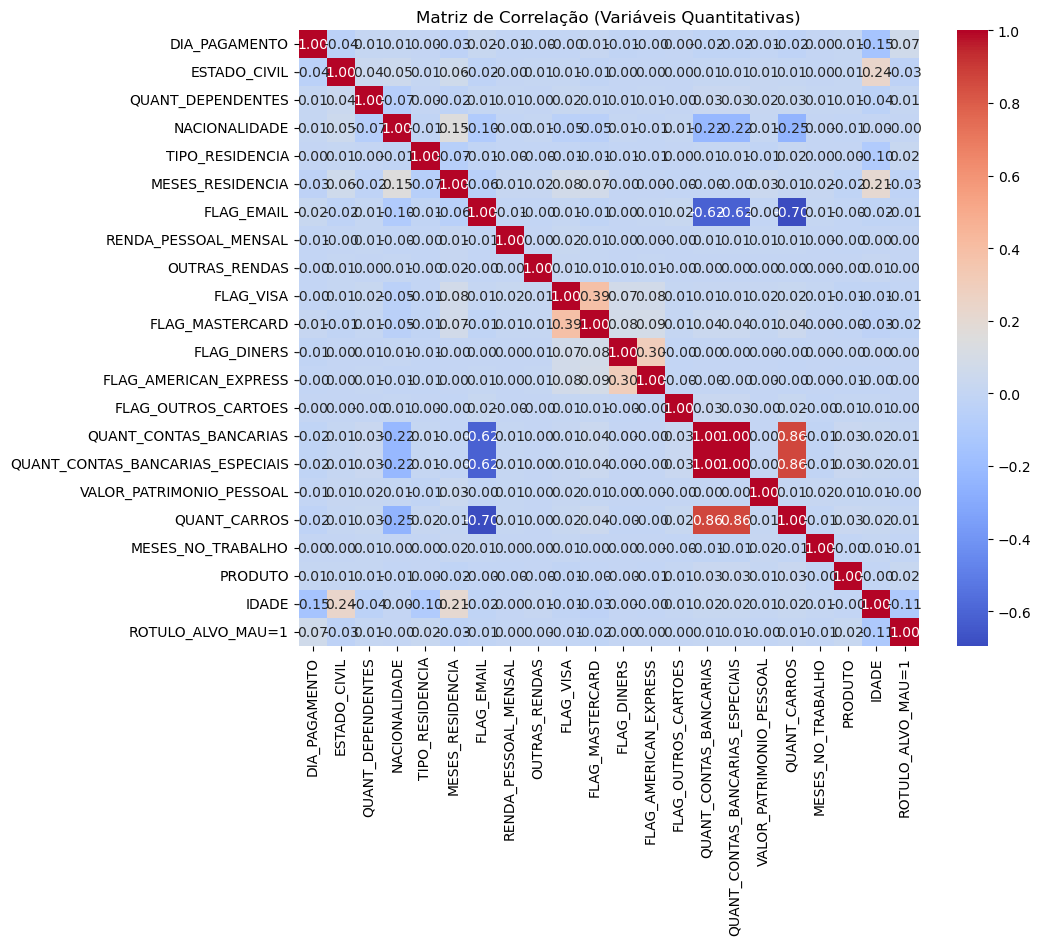

In [ ]:
### gerando um gráfico de correlação
df_quantitativo = dataset.select_dtypes(include=['int64', 'float64'])

correlacao = df_quantitativo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Variáveis Quantitativas)')
plt.show()

<Figure size 1000x800 with 0 Axes>

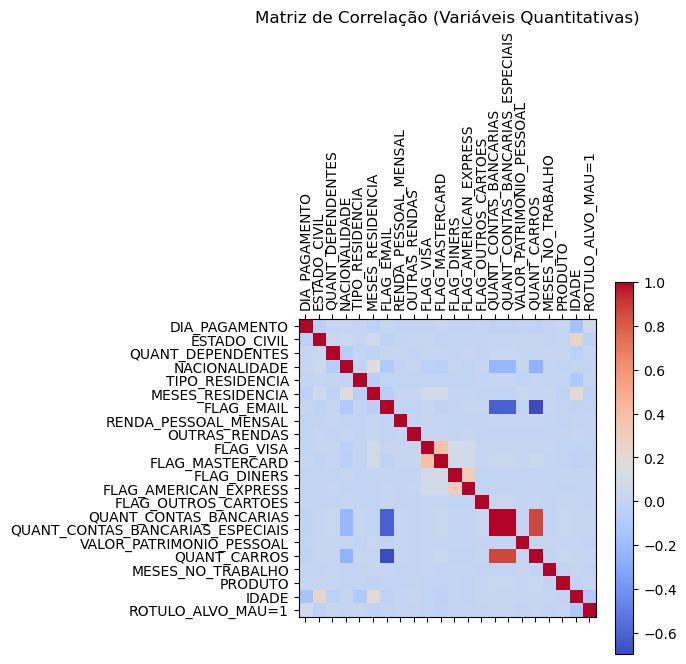

In [ ]:
# Criar o gráfico de dispersão da matriz de correlação
plt.figure(figsize=(10, 8))
plt.matshow(correlacao, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(correlacao.columns)), correlacao.columns, rotation=90)
plt.yticks(range(len(correlacao.columns)), correlacao.columns)
plt.title('Matriz de Correlação (Variáveis Quantitativas)')
plt.show()

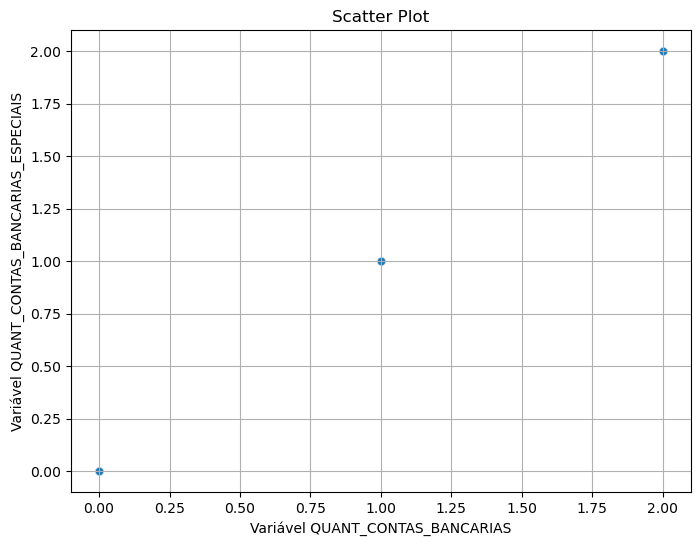

In [ ]:
### confirmando correlação fortes QUANT_CONTAS_BANCARIAS x QUANT_CONTAS_BANCARIAS_ESPECIAIS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['QUANT_CONTAS_BANCARIAS'], y=dataset['QUANT_CONTAS_BANCARIAS_ESPECIAIS'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Variável QUANT_CONTAS_BANCARIAS')
plt.ylabel('Variável QUANT_CONTAS_BANCARIAS_ESPECIAIS')
plt.grid(True)
plt.show()

In [ ]:
### removendo as contas bancarias especias devido a forte correlação
df_clientes = df_clientes.drop('QUANT_CONTAS_BANCARIAS_ESPECIAIS', axis=1)

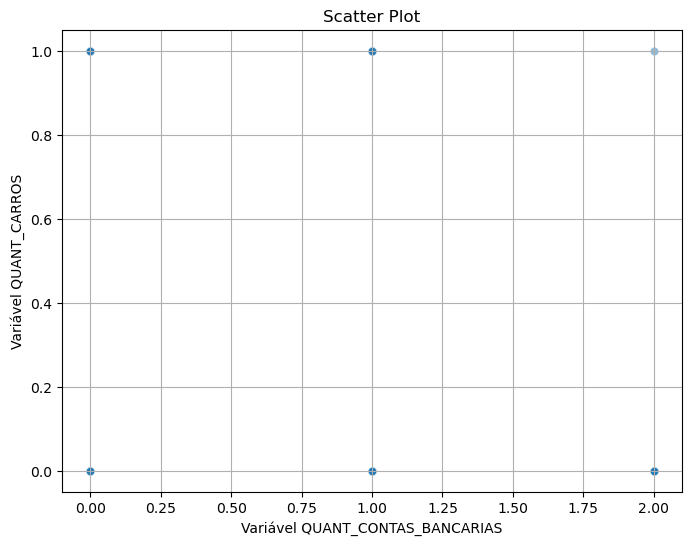

In [ ]:
### confirmando correlação fortes QUANT_CONTAS_BANCARIAS x QUANT_CARROS
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset['QUANT_CONTAS_BANCARIAS'], y=dataset['QUANT_CARROS'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('Variável QUANT_CONTAS_BANCARIAS')
plt.ylabel('Variável QUANT_CARROS')
plt.grid(True)
plt.show()

In [ ]:
### removendo as quant carros devido a forte correlação
df_clientes = df_clientes.drop('QUANT_CARROS', axis=1)

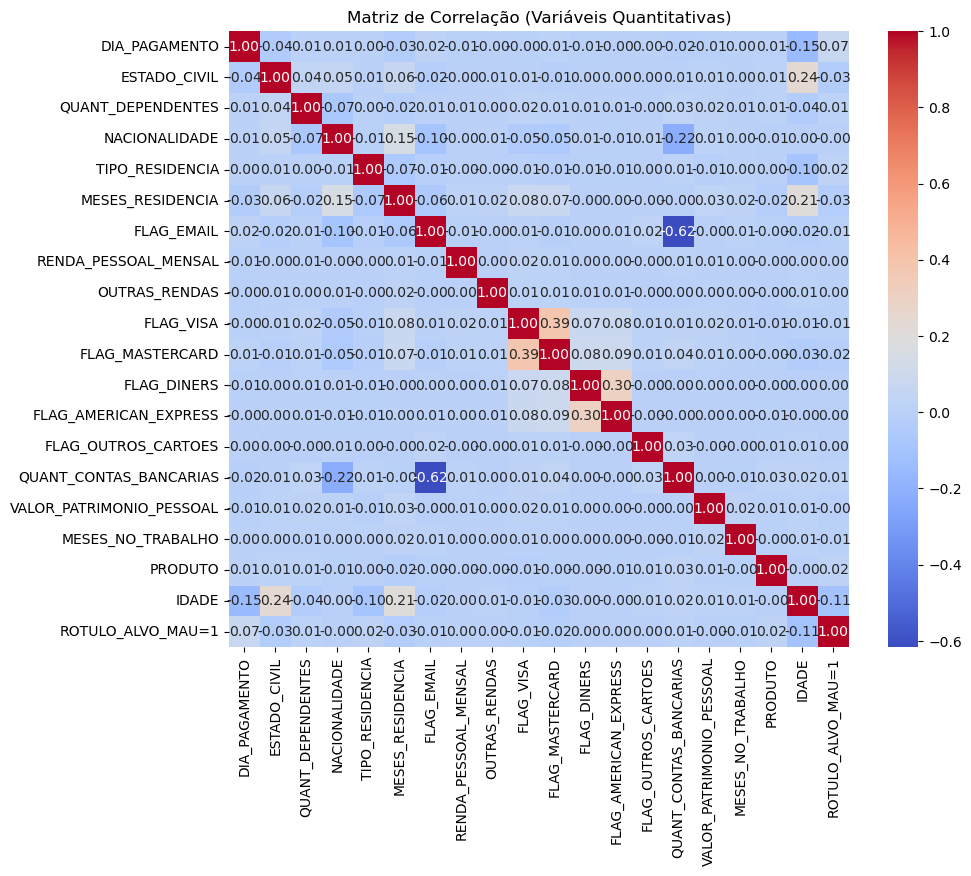

In [ ]:
### gerando um gráfico de correlação
df_quantitativo = dataset.select_dtypes(include=['int64', 'float64'])

correlacao = df_quantitativo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação (Variáveis Quantitativas)')
plt.show()

In [ ]:
### recriando o dataset para uma segunda rodada de treino

### removendo variavies de estado e cidade
df = dataset.copy()

df = df.drop(['SEXO'],axis=1)
df = df.drop(['ESTADO_NASCIMENTO'],axis=1)
df = df.drop(['CIDADE_NASCIMENTO'],axis=1)
df = df.drop(['ESTADO_RESIDENCIAL'],axis=1)
df = df.drop(['CIDADE_RESIDENCIAL'],axis=1)
df = df.drop(['FLAG_TELEFONE_MOVEL'],axis=1)
df = df.drop(['FLAG_REGISTRO_ACSP'],axis=1)

df.info()

In [ ]:
### realizando treinamento knn sem novos tratamentos

X = df.drop('ROTULO_ALVO_MAU=1', axis=1)
y = df['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test.values)

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
print(conf_matrix)

/Users/danilofonte/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      0.89      0.81      7312
           1       0.32      0.14      0.19      2688

    accuracy                           0.69     10000
   macro avg       0.53      0.52      0.50     10000
weighted avg       0.63      0.69      0.64     10000

[[6532  780]
 [2316  372]]


Realizando a retirada dos variaveis de alta correlação não há mudança na acurácia

In [ ]:
###determinando se existe um K melhor para o modelo
k_range = range(1, 50)
scores = []

for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

[0.6354, 0.7105, 0.671, 0.7214, 0.6953, 0.7227, 0.7057, 0.7236, 0.7213, 0.7367, 0.7229, 0.7223, 0.728, 0.7336, 0.7267, 0.7366, 0.7292, 0.7326, 0.7363, 0.7381, 0.7306, 0.7436, 0.731, 0.7346, 0.7336, 0.7365, 0.7367, 0.7406, 0.7461, 0.7401, 0.7385, 0.7339, 0.7336, 0.7372, 0.7371, 0.7389, 0.736, 0.7386, 0.7461, 0.7475, 0.7384, 0.7416, 0.7371, 0.7352, 0.7348, 0.7416, 0.7441, 0.7341, 0.7344]


Text(0, 0.5, 'Testing Accuracy')

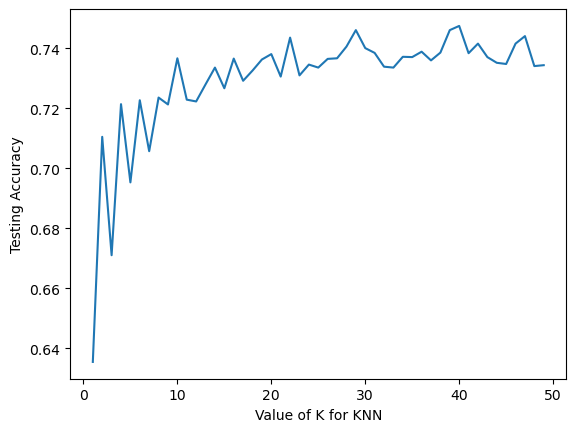

In [ ]:
### exibindo os scores
print(scores)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

o valor de K ideial encontrado é 21, aonde apresenta o maior valor de acurácia com o menor numero de k

In [ ]:
### rodando knn com o melhor K = 21
X = df.drop('ROTULO_ALVO_MAU=1', axis=1)
y = df['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test.values)

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
print(conf_matrix)

/Users/danilofonte/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7392
           1       0.57      0.00      0.01      2608

    accuracy                           0.74     10000
   macro avg       0.66      0.50      0.43     10000
weighted avg       0.70      0.74      0.63     10000

[[7386    6]
 [2600    8]]


Realizando a analise do dataset, agora com o valor de k ideal, conseguimos melhorar a acurácia em 0.04 chegando no melhor valor apresentado até o momento de 0.73

In [ ]:
### validando a relevância de cada variavel para o modelo
rfc = RandomForestClassifier()
rfc.fit(X, y)

importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

for i in range(len(importances)):
    print(f"{i + 1}. {X.columns[indices[i]]}: {importances[indices[i]]}")

1. RENDA_PESSOAL_MENSAL: 0.2788325792885768
2. IDADE: 0.2215766170286625
3. MESES_RESIDENCIA: 0.16239203635331234
4. DIA_PAGAMENTO: 0.05885499929725566
5. QUANT_DEPENDENTES: 0.055133023932286154
6. ESTADO_CIVIL: 0.042128754195452735
7. TIPO_RESIDENCIA: 0.033049392820088244
8. PRODUTO: 0.027436749300384856
9. QUANT_CONTAS_BANCARIAS: 0.02414140516274625
10. OUTRAS_RENDAS: 0.02040396727097726
11. VALOR_PATRIMONIO_PESSOAL: 0.01788109037974416
12. FLAG_EMAIL: 0.017704732911888996
13. FLAG_VISA: 0.016551361106788287
14. FLAG_MASTERCARD: 0.013017287765709507
15. NACIONALIDADE: 0.00762581286632006
16. FLAG_OUTROS_CARTOES: 0.0011735128458087586
17. FLAG_AMERICAN_EXPRESS: 0.0007711545646291886
18. MESES_NO_TRABALHO: 0.000724679432105582
19. FLAG_DINERS: 0.0006008434772625706


Removendo as variaveis com impacto menor que 0.01

In [ ]:
### removendo variaveis com menos importancia
df = df.drop(['NACIONALIDADE'],axis=1)
df = df.drop(['MESES_NO_TRABALHO'],axis=1)


In [ ]:
### realizando treinamento knn após novos tratamentos

X = df.drop('ROTULO_ALVO_MAU=1', axis=1)
y = df['ROTULO_ALVO_MAU=1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=48)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test.values)

conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
print(conf_matrix)

/Users/danilofonte/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      1.00      0.85      7418
           1       0.34      0.00      0.01      2582

    accuracy                           0.74     10000
   macro avg       0.54      0.50      0.43     10000
weighted avg       0.64      0.74      0.63     10000

[[7399   19]
 [2572   10]]


Mesmo após remover as variáveis de menor importância, com impacto menor que 0.01, e mantando o valor de k = 21, não conseguimos melhorar o resultado da acurácia quando comparado com o teste realizado anteriormente


In [ ]:
### aplicando normalização dos dados
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
### executando novamente
best_KNN = KNeighborsClassifier(n_neighbors=31)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.74      0.99      0.85      7418
           1       0.29      0.01      0.02      2582

    accuracy                           0.74     10000
   macro avg       0.52      0.50      0.43     10000
weighted avg       0.63      0.74      0.63     10000

[[7358   60]
 [2557   25]]


A normalização das variáveis apresentou leve melhora na acurácia, elevando o valor de 0.73 para 0.74


In [ ]:
# Realizar validação cruzada com 2 folds
scores = cross_val_score(knn, X, y, cv=2)

print("Acurácia para cada fold:", scores)
print("Acurácia média:", scores.mean())

Acurácia para cada fold: [0.73848 0.73888]
Acurácia média: 0.73868
